<a href="https://colab.research.google.com/github/fathiarahmaisty1/Fathia-Rahmaisty/blob/main/SC60614_Fathia_Rahmaisty_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang dibutuhkan
import pandas as pd

# Tampilkan semua kolom (agar tidak di-truncate)
pd.set_option("display.max_columns", None)

# Tampilkan data agar tidak dalam format scientific
pd.set_option('display.float_format', '{:.6f}'.format)

# Ekstraksi data
data_heart = pd.read_csv('/content/heart.csv')

# Ubah nama kolom menjadi lowercase
data_heart.columns = data_heart.columns.str.lower()
data_heart.columns = data_heart.columns.str.replace(' ', '_')

# Tampilkan data
data_heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0


In [ ]:
# Akses informasi umum pada data
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


##**1. Data Preparation**##

#### Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.

In [ ]:
# Mencari missing value
df = pd.DataFrame(data_heart)
missing_value = df.isnull().sum()
print(missing_value)

age                    0
sex                    0
cp                     0
trestbps               0
chol                   0
fbs                    0
restecg                0
thalach                0
exang                  0
oldpeak                0
slope                  0
ca                     0
thal                   0
target                 0
chol_trestbps_ratio    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1025 non-null   int64  
 1   sex                  1025 non-null   int64  
 2   cp                   1025 non-null   int64  
 3   trestbps             1025 non-null   int64  
 4   chol                 1025 non-null   int64  
 5   fbs                  1025 non-null   int64  
 6   restecg              1025 non-null   int64  
 7   thalach              1025 non-null   int64  
 8   exang                1025 non-null   int64  
 9   oldpeak              1025 non-null   float64
 10  slope                1025 non-null   int64  
 11  ca                   1025 non-null   int64  
 12  thal                 1025 non-null   int64  
 13  target               1025 non-null   int64  
 14  chol_trestbps_ratio  1025 non-null   float64
dtypes: float64(2), int64(13)
memory usage:

**Interpretasi:** Dari hasil yang diperoleh tidak ditemukan adanya missing value jadi tidak perlu ada tindakan apapun.


### Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.

In [ ]:
# Mencari duplicate value
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool


In [ ]:
# Menampilkan duplicate value
print(df[duplicates])

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0 0.700000   
31     50    0   1       120   244    0        1      162      0 1.100000   
43     46    1   0       120   249    0        0      144      0 0.800000   
55     55    1   0       140   217    0        1      111      1 5.600000   
61     66    0   2       146   278    0        0      152      0 0.000000   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1 0.000000   
1021   60    1   0       125   258    0        0      141      1 2.800000   
1022   47    1   0       110   275    0        0      118      1 1.000000   
1023   50    0   0       110   254    0        0      159      0 0.000000   
1024   54    1   0       120   188    0        1      113      0 1.400000   

      slope  ca  thal  target  
15        2   0     2       1  
31        2

In [ ]:
# menghitung banyaknya baris duplikasi
print(duplicates.sum())

723


In [ ]:
# menampilkan dataset tanpa duplikasi
df_without_duplicates = df.drop_duplicates()
df_without_duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_trestbps_ratio
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0,1.696000
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0,1.450000
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0,1.200000
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0,1.371622
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0,2.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.500000,1,0,2,1,1.758333
733,44,0,2,108,141,0,1,175,0,0.600000,1,0,2,1,1.305556
739,52,1,0,128,255,0,1,161,1,0.000000,2,1,3,0,1.992188
843,59,1,3,160,273,0,0,125,0,0.000000,2,0,2,0,1.706250


**Interpretasi:** Setelah menghapus duplikasi pada dataset, jumlah baris pada dataset berkurang menjadi 302 dari yang sebelumnya berjumlah 1025 baris.

### Outlier: Memeriksa outlier dan menangani outlier jika ada.



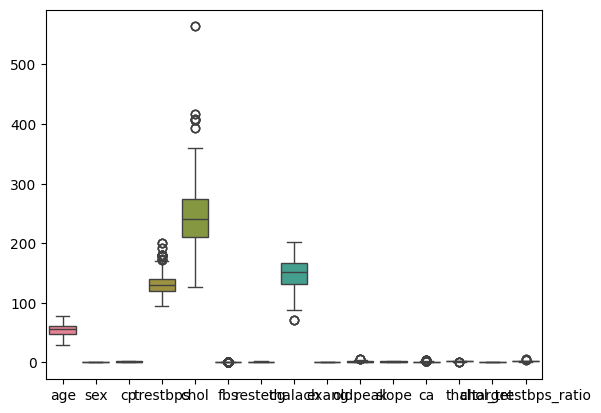

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat boxplot untuk setiap kolom
sns.boxplot(data=df.select_dtypes(include=['number']))

# Tampilkan plot
plt.show()

**Interpretasi:** Terdapat outlier pada kolom trestbps, chol, dan thalach.

Untuk mengatasi outlier tersebut, saya akan meng-filter dataframe dari outlier menggunakan z-score

In [ ]:
import pandas as pd
import numpy as np

def remove_outliers_zscore(df_without_duplicates, column_name, threshold=3):
  mean = df_without_duplicates[column_name].mean()
  std = df_without_duplicates[column_name].std()
  abs_z_scores = np.abs(df_without_duplicates[column_name] - mean) / std
  return df_without_duplicates.loc[abs_z_scores < threshold]

# Example usage with threshold of 3 standard deviations
df_filtered1 = remove_outliers_zscore(df_without_duplicates.copy(), 'chol')
df_filtered2 = remove_outliers_zscore(df_filtered1.copy(), 'trestbps')
df_final = remove_outliers_zscore(df_filtered1.copy(), 'thalach')
print(df_final)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0 1.000000   
1     53    1   0       140   203    1        0      155      1 3.100000   
2     70    1   0       145   174    0        1      125      1 2.600000   
3     61    1   0       148   203    0        1      161      0 0.000000   
4     62    0   0       138   294    1        1      106      0 1.900000   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0 1.500000   
733   44    0   2       108   141    0        1      175      0 0.600000   
739   52    1   0       128   255    0        1      161      1 0.000000   
843   59    1   3       160   273    0        0      125      0 0.000000   
878   54    1   0       120   188    0        1      113      0 1.400000   

     slope  ca  thal  target  chol_trestbps_ratio  
0        2   2     3       0       

<Axes: >

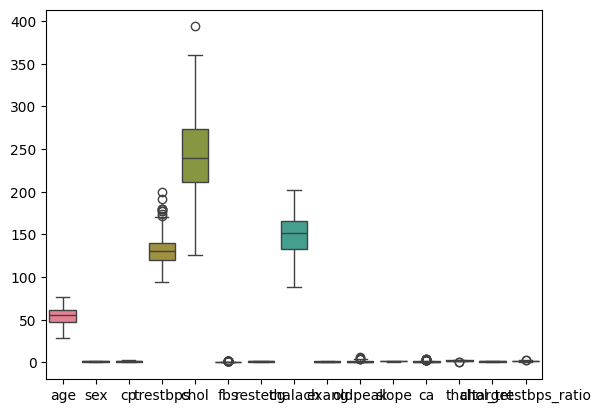

In [ ]:
sns.boxplot(data=df_final.select_dtypes(include=['number']))

### Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.

<Axes: title={'center': 'target'}, ylabel='Frequency'>

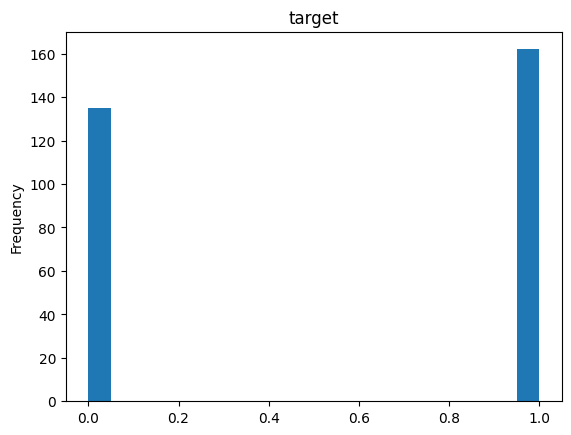

In [ ]:
df_final['target'].plot(kind='hist', bins=20, title='target')

### Feature encoding: Melakukan feature encoding jika diperlukan.

Feature encoding tidak perlu dilakukan karena seluruh unsur kolom sudah berbentuk numerik

##**2. Exploratory Data Analysis (EDA)**##
 Menggunakan dataset yang sama, Peserta diminta untuk:
* Mengelaborasi features dan tipe data (nominal, ordinal, numerical)
* Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus
* Menemukan dan mendeskripsikan statistical five summaries
* Mendeskripsikan distribusi data



###### 1. Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [ ]:
NumericDtype = {'age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'}
CategoricalDtype = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

df_dtype = df_final.copy()
df_dtype[CategoricalDtype] = df_final[CategoricalDtype].astype(object)

features = pd.DataFrame({'Features': df_dtype.columns.to_list()})

def num_or_cat(x):
    if x in CategoricalDtype:
        return 'Categorical'
    return 'Numeric'

features['tipe data'] = features['Features'].apply(num_or_cat)
print(features)

    Features    tipe data
0        age      Numeric
1        sex  Categorical
2         cp  Categorical
3   trestbps      Numeric
4       chol      Numeric
5        fbs  Categorical
6    restecg  Categorical
7    thalach      Numeric
8      exang  Categorical
9    oldpeak      Numeric
10     slope  Categorical
11        ca      Numeric
12      thal  Categorical
13    target  Categorical


###### 2. Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

*   Mean : Rata-rata dari semua nilai dalam suatu dataset
*   Median : Nilai tengah dari semua nilai dalam suatu dataset, ketika diurutkan dari terkecil ke terbesar
*   Modus : Nilai yang paling sering muncul dalam suatu dataset

Perbedaan:
*   Mean sensitif terhadap outlier, sedangkan median dan modus tidak
*  Mean terpengaruh oleh distribusi data, sedangkan median dan modus tidak
*  Mean memberikan informasi tentang pusat data, sedangkan median memberikan informasi tentang titik tengah data dan modus memberikan informasi tentang nilai yang paling umum








###### 3. Menemukan dan mendeskripsikan Statistical Five Summaries

In [ ]:
# Menghitung statistical five summaries
df_final.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.265993,0.690236,0.966330,131.599327,243.801347,0.148148,0.531987,149.757576,0.329966,1.029293,1.400673,0.710438,2.309764,0.545455
std,9.028855,0.463177,1.032681,17.632253,45.837156,0.355846,0.526161,22.625666,0.470994,1.156847,0.618739,1.001852,0.613755,0.498770
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,394.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Interpretasi:** Berdasarkan tabel ringkasan statistik, dapat dideskripsikan distribusi data:
1.   Mean: Memberikan informasi tentang pusat data
2.   Median: Memberikan informasi tentang titik tengah data
3. Std: Memberikan informasi tentang seberapa terpencar data
4. Min: Memberikan informasi tentang nilai maksimum yang mungkin terjadi
5. Max: Memberikan informasi tentang nilai maksimum yang mungkin terjadi



###### 4. Mendeskripsikan distribusi data

<ipython-input-21-4f6613f90d92>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_final[NumericDtype].plot(


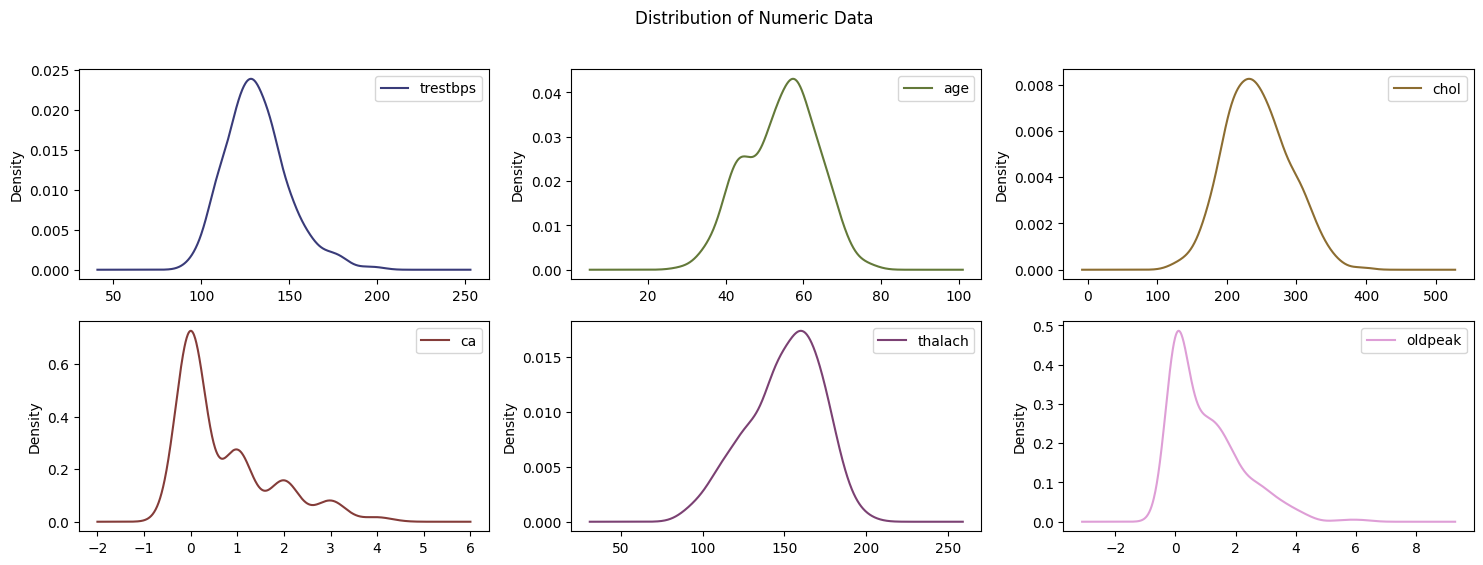

In [ ]:
df_final[NumericDtype].plot(
    title = 'Distribution of Numeric Data',
    kind = 'density',
    subplots = True,
    layout = (2,3),
    sharex = False,
    ylabel = False,
    figsize = (18,6),
    colormap ='tab20b'
)
plt.show()

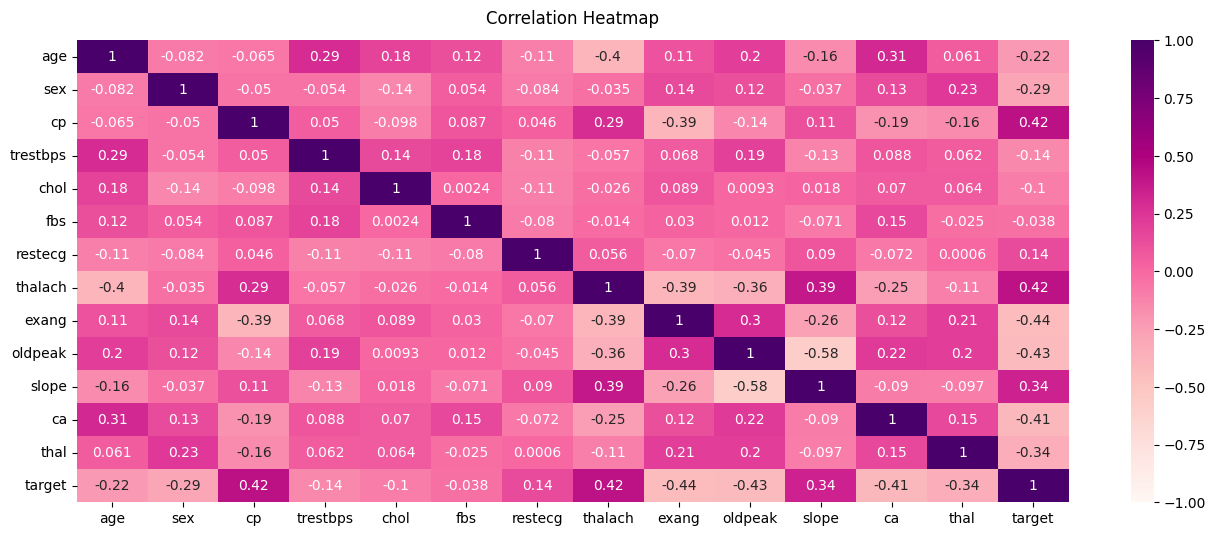

In [ ]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df_final.corr(), vmin=-1, vmax=1, annot=True, cmap='RdPu')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':12}, pad=12)
plt.show()

##**3. Feature Engineering**##

Menggunakan dataset yang sama, Peserta diminta untuk dapat membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membantu bisnis ecommerce dalam menghadapi tantangan bisnis yang ada.
Masalah/objective yang ingin diselesaikan/dicapai diserahkan kepada Peserta untuk dapat mencari permasalahan yang menurut Peserta paling penting.

**Attribute Information**
1. age
2. sex(1=male, 0=female)
3. cp: chest paint type (4 values)
4. trestbps: resting blood pressure (in mm Hg on admission to the Hospital)
5. chol: serum cholestoral (in mg/dl)
6. fbs: fasting blood sugar > 120 mg/dl (1=true; 0=false)
7. restecg : resting electrocardiographic results (values 0,1,2)
8. talach: max heart rate achieved
9. exang: exercise induced angina (1=yes; 0=no)
10. oldepeak: ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) coloroded by flourosopy
13. thal: 0=normal; 1=fixed defect; 2= reversable defect



#####  1. Rata-rata tekanan darah berdasarkan jenis kelamin

In [ ]:
# Menghitung rata-rata tekanan darah berdasarkan jenis kelamin
avg_trestbps_by_sex = df.groupby('sex')['trestbps'].mean()

# Menampilkan hasil
print(avg_trestbps_by_sex)

sex
0   133.701923
1   130.697055
Name: trestbps, dtype: float64


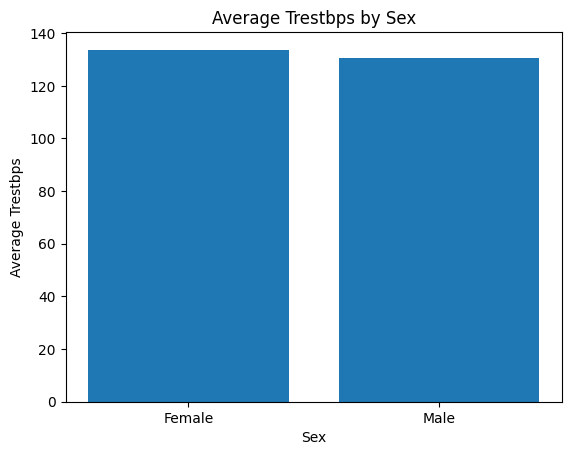

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung rata-rata tekanan darah berdasarkan jenis kelamin
avg_trestbps_by_sex = df.groupby('sex')['trestbps'].mean().reset_index()

# Membuat visualisasi menggunakan bar chart
plt.bar(avg_trestbps_by_sex['sex'], avg_trestbps_by_sex['trestbps'])
plt.xlabel('Sex')
plt.ylabel('Average Trestbps')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Average Trestbps by Sex')
plt.show()

**Interpretasi:** Dari data yang ada, rata-rata tekanan darah pada kelompok jenis kelamin wanita (Female) adalah sekitar 133.70 mm Hg, sedangkan pada kelompok jenis kelamin pria (Male) adalah sekitar 130.70 mm Hg. Hal ini menunjukkan bahwa pada sampel data ini, rata-rata tekanan darah cenderung sedikit lebih tinggi pada kelompok jenis kelamin wanita dibandingkan dengan kelompok jenis kelamin pria.







##### 2. Persentase pasien dengan kadar gula darah puasa tinggi

In [ ]:
import pandas as pd

# Menghitung jumlah pasien dengan kadar gula darah puasa tinggi
total_high_fbs = data_heart[data_heart['fbs'] == 1]['fbs'].count()

# Menghitung jumlah total pasien
total_patients = data_heart['fbs'].count()

# Menghitung persentase pasien dengan kadar gula darah puasa tinggi
high_fbs_percentage = (total_high_fbs / total_patients) * 100

# Menghitung persentase pasien dengan kadar gula darah normal
normal_fbs_percentage = 100 - high_fbs_percentage

# Visualisasi
import plotly.express as px

data = {'Kategori': ['Kadar Gula Darah Puasa Tinggi', 'Kadar Gula Darah Normal'],
        'Persentase': [high_fbs_percentage, normal_fbs_percentage]}
fig = px.pie(data, values='Persentase', names='Kategori',
             title='Persentase Pasien dengan Kadar Gula Darah Puasa Tinggi')
fig.show()

**Interpretasi:**
Dari data yang ada, sekitar 85.1% pasien memiliki kadar gula darah puasa dalam kisaran normal, sementara 14.9% pasien memiliki kadar gula darah puasa yang tinggi. Hal ini menunjukkan bahwa mayoritas pasien dalam dataset Heart Disease ini memiliki kadar gula darah puasa yang normal, sedangkan sebagian kecil dari pasien memiliki kadar gula darah puasa yang tinggi.

##### 3. Rata-rata detak jantung maksimum berdasarkan kelompok usia

In [ ]:
import pandas as pd
import plotly.express as px

# Membuat kolom baru untuk kelompok usia
bins = [0, 40, 60, 100]  # Batas-batas kelompok usia
labels = ['Muda', 'Tua', 'Lansia']  # Label kelompok usia
data_heart['age_group'] = pd.cut(data_heart['age'], bins=bins, labels=labels, right=False)

# Menghitung rata-rata detak jantung maksimum berdasarkan kelompok usia
avg_thalach_by_age = data_heart.groupby('age_group')['thalach'].mean().reset_index()

# Visualisasi menggunakan Plotly
fig = px.bar(avg_thalach_by_age, x='age_group', y='thalach',
             title='Rata-rata Detak Jantung Maksimum berdasarkan Usia',
             labels={'age_group': 'Kelompok Usia', 'thalach': 'Rata-rata Detak Jantung Maksimum'})

# Menampilkan plot interaktif
fig.show()

**Interpretasi:**
*   Kelompok Usia "Muda" (Umur 0-40 tahun): Rata-rata detak jantung maksimum pada kelompok usia muda adalah sekitar 171,0877 bpm (beats per minute). Ini menunjukkan bahwa pada rata-rata, detak jantung maksimum pada kelompok usia muda berada pada kisaran tersebut.
*  Kelompok Usia "Tua" (Umur 40-60 tahun): Rata-rata detak jantung maksimum pada kelompok usia tua adalah sekitar 151,4507 bpm. Hal ini menunjukkan bahwa rata-rata detak jantung maksimum pada kelompok usia tua cenderung sedikit lebih rendah dibandingkan dengan kelompok usia muda.

*   Kelompok Usia "Lansia" (Umur 60-100 tahun): Rata-rata detak jantung maksimum pada kelompok usia lansia adalah sekitar 140,0777 bpm. Ini menunjukkan bahwa rata-rata detak jantung maksimum pada kelompok usia lansia cenderung lebih rendah dibandingkan dengan kelompok usia muda dan tua.






##### 4. Membuat kolom baru yang mengkategorikan tekanan darah (trestbps) menjadi kategori berdasarkan rentang nilai tekanan darah.

In [ ]:
import pandas as pd

# Definisikan rentang nilai tekanan darah untuk setiap kategori
blood_pressure_ranges = {
    'Normal': (0, 120),
    'Prehypertension': (120, 140),
    'Hypertension': (140, float('inf'))
}

# Membuat fungsi untuk mengkategorikan tekanan darah
def categorize_blood_pressure(value):
    for category, (lower, upper) in blood_pressure_ranges.items():
        if lower <= value < upper:
            return category
    return 'Unknown'

# Membuat kolom baru "Blood Pressure Category"
df['Blood Pressure Category'] = df['trestbps'].apply(categorize_blood_pressure)

# Menampilkan data setelah ditambahkan kolom baru
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0 1.000000      2   
1   53    1   0       140   203    1        0      155      1 3.100000      0   
2   70    1   0       145   174    0        1      125      1 2.600000      0   
3   61    1   0       148   203    0        1      161      0 0.000000      2   
4   62    0   0       138   294    1        1      106      0 1.900000      1   

   ca  thal  target  chol_trestbps_ratio Blood Pressure Category  
0   2     3       0             1.696000         Prehypertension  
1   0     3       0             1.450000            Hypertension  
2   0     3       0             1.200000            Hypertension  
3   1     3       0             1.371622            Hypertension  
4   3     2       0             2.130435         Prehypertension  


In [ ]:
import plotly.express as px

# Menghitung jumlah data dalam setiap kategori
category_counts = df['Blood Pressure Category'].value_counts().reset_index()

# Visualisasi menggunakan bar chart
fig = px.bar(category_counts, x='index', y='Blood Pressure Category',
             labels={'index': 'Blood Pressure Category', 'Blood Pressure Category': 'Count'},
             title='Distribution of Blood Pressure Category')

# Menampilkan grafik
fig.show()

**Interpretasi:**

*   Terdapat 50 data yang masuk ke dalam kategori prehipertensi. Kategori ini mencakup individu dengan tekanan darah di antara rentang 120-139 mmHg untuk tekanan sistolik (angka atas) atau 80-89 mmHg untuk tekanan diastolik (angka bawah). Jumlah data ini menunjukkan bahwa sejumlah individu dalam dataset memiliki tekanan darah yang cukup tinggi, tetapi belum mencapai level hipertensi.
*   Terdapat 324 data yang masuk ke dalam kategori hipertensi. Kategori ini mencakup individu dengan tekanan darah yang melebihi 140 mmHg untuk tekanan sistolik atau 90 mmHg untuk tekanan diastolik. Jumlah data ini menunjukkan bahwa sejumlah individu dalam dataset memiliki tekanan darah yang tinggi dan masuk ke dalam kategori hipertensi.
*   Normal: Terdapat 201 data yang masuk ke dalam kategori normal. Kategori ini mencakup individu dengan tekanan darah di bawah 120 mmHg untuk tekanan sistolik dan di bawah 80 mmHg untuk tekanan diastolik.
*   






##### 5. Membuat kolom baru yang mengkategorikan kadar kolesterol (chol) menjadi kategori seperti "Normal", "High", atau "Very High" berdasarkan rentang nilai kolesterol.

In [ ]:
import pandas as pd
import plotly.express as px

# Definisikan rentang nilai kolesterol untuk setiap kategori
cholesterol_ranges = {
    'Normal': (0, 200),
    'High': (200, 240),
    'Very High': (240, float('inf'))
}

# Membuat fungsi untuk mengkategorikan kadar kolesterol
def categorize_cholesterol(value):
    for category, (lower, upper) in cholesterol_ranges.items():
        if lower <= value < upper:
            return category
    return 'Unknown'

# Membuat kolom baru "Cholesterol Category"
df['Cholesterol Category'] = df['chol'].apply(categorize_cholesterol)

# Menghitung jumlah data dalam setiap kategori
category_counts = df['Cholesterol Category'].value_counts().reset_index()

# Membuat visualisasi
fig = px.bar(category_counts, x='index', y='Cholesterol Category',
             labels={'index': 'Cholesterol Category', 'Cholesterol Category': 'Count'},
             title='Distribution of Cholesterol Categories')
fig.show()

**Interpretasi:**

* Terdapat 517 data yang masuk ke dalam kategori Very High. Kategori ini mencakup individu dengan kadar kolesterol di atas 240 mg/dL.
* Terdapat 339 data yang masuk ke dalam kategori High. Kategori ini mencakup individu dengan kadar kolesterol antara 200-239 mg/dL
* Terdapat 169 data yang masuk ke dalam kategori Normal. Kategori ini mencakup individu dengan kadar kolesterol di bawah 200 mg/dL.






##### 6. Menghitung Maximum Heart Rate Reserve (MHRR) : Selisih antara Thalach dan Trestbps

In [ ]:
import pandas as pd
import plotly.express as px

# Menghitung Max Heart Rate Reserve (MHRR)
df['MHRR'] = df['thalach'] - df['trestbps']

# Membuat histogram MHRR
fig = px.histogram(df, x='MHRR', nbins=20, title='Max Heart Rate Reserve Distribution')
fig.update_layout(xaxis_title='Max Heart Rate Reserve', yaxis_title='Count')
fig.show()

**Interpretasi:**
Histogram Max Heart Rate Reserve (MHRR) memberikan gambaran tentang distribusi selisih antara detak jantung maksimum dan detak jantung istirahat. Histogram ini menggambarkan seberapa besar kapasitas detak jantung individu untuk meningkatkan denyut jantung selama aktivitas fisik. Berdasarkan hasil yang diperoleh dapat dilihat bahwa sebaran histogram menjulur ke kanan, artinya sebagian besar nilai MHRR cenderung tinggi. Hal ini menunjukkan bahwa pada dataset tersebut banyak individu yang memiliki selisih tinggi antara detak jantung maksimum (thalach) dan tekanan darah istirahat (trestbps).

##### 7. Menghitung skor risiko penyakit jantung

In [ ]:
import pandas as pd
import plotly.express as px

# Menghitung Heart Disease Risk Score
df['Heart_Disease_Risk_Score'] = 0.5 * df['age'] + 0.3 * df['sex'] + 0.1 * df['trestbps'] + 0.1 * df['chol']

# Histogram
fig = px.histogram(df, x='Heart_Disease_Risk_Score', nbins=20, title='Heart Disease Risk Score Distribution')
fig.update_layout(xaxis_title='Heart Disease Risk Score', yaxis_title='Count')
fig.show()

**Interpretasi:**
Histogram skor risiko penyakit jantung menjulur ke kanan, artinya sebagian besar individu dalam dataset memiliki skor risiko yang cenderung tinggi. Hal ini menunjukkan bahwa variabel yang digunakan dalam perhitungan skor risiko, yaitu umur, jenis kelamin, tekanan darah, dan kadar kolesterol, berkontribusi pada peningkatan risiko penyakit jantung.

##### 8. Membuat kolom biner baru yang menunjukkan keberadaan atau ketiadaan angina yang dipicu oleh aktivitas fisik berdasarkan variabel exercise induced angina (exang).

In [ ]:
import pandas as pd
import plotly.express as px

df['Exercise_Induced_Angina'] = df['exang'].map({0: 'No', 1: 'Yes'})

fig = px.bar(df, x='Exercise_Induced_Angina', title='Exercise-induced Angina')
fig.update_layout(xaxis_title='Exercise-induced Angina', yaxis_title='Count')
fig.show()

**Interpretasi:**
Diagram batang menunjukkan jumlah individu pada dataset yang mengalami atau tidak mengalami angina yang dipicu oleh aktivitas fisik. Hasil menunjukkan bahwa "No" lebih tinggi, artinya lebih banyak individu yang tidak mengalami angina yang dipicu oleh aktivitas fisik.

##### 9. Menghitung rata-rata usia pasien dengan tipe nyeri dada tertentu. Hubungan antara usia dan tipe nyeri dada pada pasien.

In [ ]:
import pandas as pd
import plotly.express as px

# Calculate average age by chest pain type
avg_age_by_cp = df.groupby('cp')['age'].mean().reset_index()
avg_age_by_cp.rename(columns={'cp': 'Chest_Pain_Type', 'age': 'Average_Age'}, inplace=True)

# Create a bar chart to visualize the average age by chest pain type
fig = px.bar(avg_age_by_cp, x='Chest_Pain_Type', y='Average_Age', title='Average Age by Chest Pain Type')
fig.update_layout(xaxis_title='Chest Pain Type', yaxis_title='Average Age')
fig.show()

**Interpretasi:**
Dalam konteks umum pada dataset Heart Disease, tipe nyeri dada biasanya diklasifikasikan sebagai berikut:

1. Tipe Nyeri Dada 0: Tipe nyeri dada 0 umumnya mengindikasikan bahwa pasien tidak mengalami nyeri dada. Ini menunjukkan bahwa pasien tidak mengalami gejala nyeri di dada sebagai manifestasi dari penyakit jantung.
2. Tipe Nyeri Dada 1: Tipe nyeri dada 1 dapat mengacu pada nyeri dada yang terkait dengan ketidaknyamanan ringan. Pasien dengan tipe nyeri dada ini mungkin mengalami ketidaknyamanan atau sensasi terbakar di daerah dada.
3. Tipe Nyeri Dada 2: Tipe nyeri dada 2 mungkin mengindikasikan nyeri dada yang lebih intens dibandingkan dengan tipe nyeri dada 1. Pasien dengan tipe nyeri dada ini mungkin mengalami nyeri yang lebih kuat dan mungkin merasakan tekanan atau berat di dada.
4. Tipe Nyeri Dada 3: Tipe nyeri dada 3 biasanya mengacu pada nyeri dada yang berat dan mengganggu aktivitas sehari-hari. Pasien dengan tipe nyeri dada ini mungkin mengalami nyeri hebat, sesak napas, dan ketidaknyamanan yang signifikan di daerah dada.

Berdasarkan hasil perhitungan rata-rata usia (average age) untuk setiap tipe nyeri dada, ditemukan hasil berikut:

1. Tipe Nyeri Dada 0: Rata-rata usia pasien dengan tipe nyeri dada 0 adalah sekitar 55,78 tahun (dibulatkan).
2. Tipe Nyeri Dada 1: Rata-rata usia pasien dengan tipe nyeri dada 1 adalah sekitar 51,25 tahun (dibulatkan).
3. Tipe Nyeri Dada 2: Rata-rata usia pasien dengan tipe nyeri dada 2 adalah sekitar 53,52 tahun (dibulatkan).
4. Tipe Nyeri Dada 3: Rata-rata usia pasien dengan tipe nyeri dada 3 adalah sekitar 56,01 tahun (dibulatkan).

##### 10. Menghitung persentase pasien yang memiliki kelainan gelombang T pada EKG(restecg=2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung persentase pasien dengan T wave abnormal
total_patients = len(df)
t_wave_abnormality_count = len(df[df['restecg'] == 2])
t_wave_abnormality_percentage = (t_wave_abnormality_count / total_patients) * 100

# Membuat pie chartnya
labels = ['Normal EKG', 'T Wave Abnormality']
values = [100 - t_wave_abnormality_percentage, t_wave_abnormality_percentage]

fig = px.pie(labels=labels, values=values, title='Percentage of Patients with T Wave Abnormality')
fig.show()

**Interpretasi:**
Diagram lingkaran menunjukkan persentase pasien dengan kelainan gelombang T pada EKG (restecg=2) dibandingkan dengan pasien dengan EKG normal. Dalam dataset Heart Disease, kelainan gelombang T pada EKG (restecg=2) terjadi pada jumlah yang relatif kecil dibandingkan dengan pasien dengan EKG normal. Persentase yang rendah untuk kelainan gelombang T menunjukkan bahwa kelainan ini mungkin merupakan kondisi yang jarang terjadi pada populasi yang diamati.